# Kuzushiji-MNIST Classification



<p align="center">
  <img src="https://raw.githubusercontent.com/rois-codh/kmnist/master/images/kmnist_examples.png">
</p>

<p align="center">
    The 10 classes of Kuzushiji-MNIST, with the first column showing each character's modern hiragana counterpart.
</p>

## About Kuzushiji Dataset
The Kuzushiji-MNIST dataset which focuses on Kuzushiji(cursive Japanese) is a classification problem similar to the MNIST dataset. It contains images of the first ten entries from the main Japanese hiragana character groups.

## Image Specifications

- Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total.
- The images are storred in numpy arrays of 60,000 x 28 x 28 and 10,000 x 28 x 28, respectively. 
- The labels are also stored in two numpy arrays, one for train and another for the test set.

In [53]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import time # benchmarking and timing

# plotting
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.manifold import TSNE # dimensionality reduction

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['k49-test-labels.npz', 'kmnist_classmap.csv', 'k49-test-imgs.npz', 'k49-train-imgs.npz', 'kmnist-train-imgs.npz', 'kmnist-test-labels.npz', 'kmnist-train-labels.npz', 'train-images-idx3-ubyte', 'k49-train-labels.npz', 'kmnist-test-imgs.npz', 'k49_classmap.csv', 't10k-images-idx3-ubyte', 'kkanji', 't10k-labels-idx1-ubyte', 'train-labels-idx1-ubyte']


## Exploratory Data Analysis

### Loading the dataset
The npz files are stored as a dictionary and the key can be accesed to retreive the numpy array by using 'arr_0' as mentioned in the source dataset repository: https://github.com/rois-codh/kmnist

>Which format do I download?

>If you're looking for a drop-in replacement for the MNIST or Fashion-MNIST dataset (for tools that currently work with these datasets), download the data in MNIST format.
>Otherwise, it's recommended to download in NumPy format, which can be loaded into an array as easy as:
arr = np.load(filename)['arr_0']

In [4]:
train_images = np.load('../input/kmnist-train-imgs.npz')['arr_0']
test_images = np.load('../input/kmnist-test-imgs.npz')['arr_0']
train_labels = np.load('../input/kmnist-train-labels.npz')['arr_0']
test_labels = np.load('../input/kmnist-test-labels.npz')['arr_0']

In [38]:
char_df = pd.read_csv('../input/kmnist_classmap.csv', encoding = 'utf-8')

In [39]:
char_df.T

,0,1,2,3,4,5,6,7,8,9
index,0,1,2,3,4,5,6,7,8,9
codepoint,U+304A,U+304D,U+3059,U+3064,U+306A,U+306F,U+307E,U+3084,U+308C,U+3092
char,お,き,す,つ,な,は,ま,や,れ,を


### Visualizing the character images

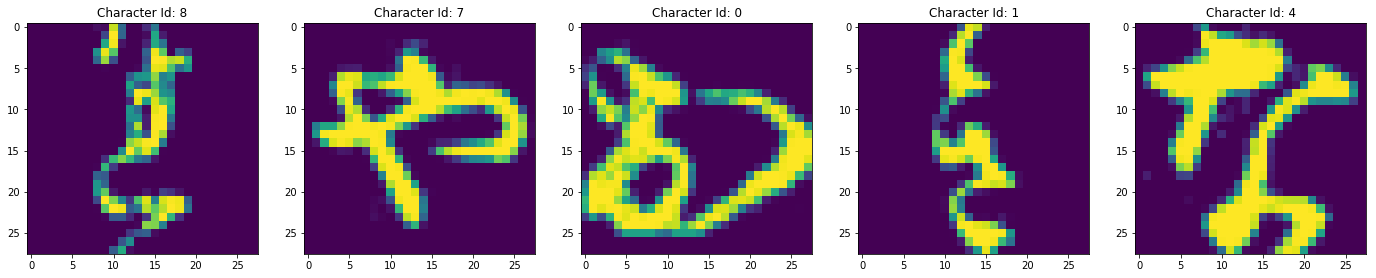

In [51]:
plt.figure(figsize=(24, 24))
for i in range(5):  
    plt.subplot(1, 5, i+1).set_title(u'Character Id: {}'.format(train_labels[i]))
    plt.imshow(train_images[i])
plt.show()

Since the character map is not as familiar to us like the numerals in MNIST we can see the character corresponing to the id of image as follows

In [49]:
for i in range(5):
    print("The {} character is : {}".format(i+1, char_df['char'][train_labels[i]]))

The 1 character is : れ
The 2 character is : や
The 3 character is : お
The 4 character is : き
The 5 character is : な


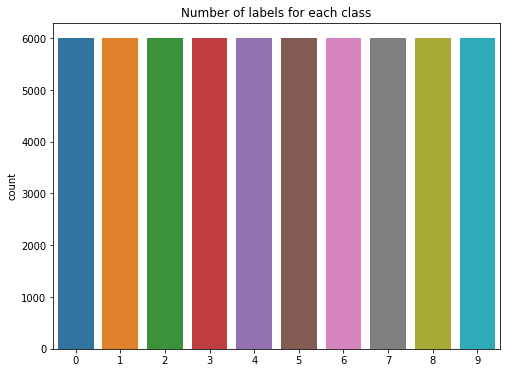

In [57]:
labels = char_df['char']
f, ax = plt.subplots(1,1, figsize=(8,6))
g = sns.countplot(train_labels)
g.set_title("Number of labels for each class")
g.set_xticklabels(range(10))
plt.show()   

In [61]:
SEED = 42

# Sample from the training set
sample_size = 10000

np.random.seed(SEED)
idx = np.random.choice(60000, size=sample_size, replace=False)
train_sample = train_images.reshape(60000, -1)[idx, :]
label_sample = train_labels[idx]

# Generate 2D embedding with TSNE
embeddings = TSNE(verbose=2).fit_transform(train_sample)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 10000 samples in 1.079s...
[t-SNE] Computed neighbors for 10000 samples in 204.791s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 600.543790
[t-SNE] Computed conditional probabilities in 1.013s
[t-SNE] Iteration 50: error = 96.5566254, gradient norm = 0.0005340 (50 iterations in 9.016s)
[t-SNE

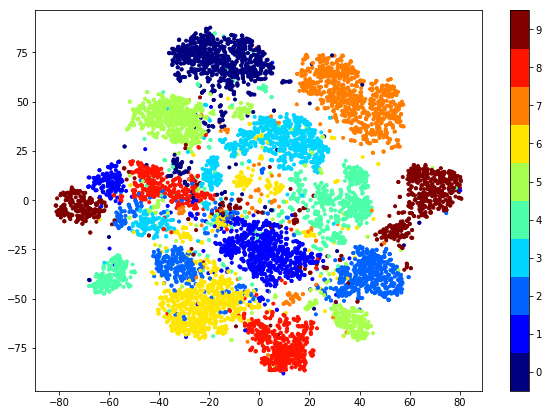

In [62]:
# Visualize TSNE embedding
vis_x = embeddings[:, 0]
vis_y = embeddings[:, 1]

plt.figure(figsize=(10,7))
plt.scatter(vis_x, vis_y, c=label_sample, cmap=plt.cm.get_cmap("jet", 10), marker='.')
plt.colorbar(ticks=range(10))
plt.clim(-0.5, 9.5)
plt.show()

## Preprocessing the Data



In [63]:
# scaling the images
train_images = train_images / 255.0
test_images = test_images / 255.0

In [64]:
# flattening the images for train from : (60000, 28, 28) --> (60000, 784) & similarly for test
X_train_flat = train_images.reshape(60000, -1)
X_test_flat = test_images.reshape(10000,-1)

In [70]:
print(X_train_flat.shape)
print(X_test_flat.shape)

(60000, 784)
(10000, 784)
CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 250 µs


## Model Selection
Now that we have some idea about the dataset we can try diffrent models to see how they perform.

### K-NearestNeighbour

In [74]:
%%time
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=4, weights='distance', n_jobs=-1)
print('Fitting', clf)
clf.fit(X_train_flat, train_labels)
print('Test accuracy:', clf.score(X_test_flat, test_labels))

Fitting KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=4, p=2,
           weights='distance')
Evaluating KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=4, p=2,
           weights='distance')
Test accuracy: 0.9159
CPU times: user 34min 31s, sys: 740 ms, total: 34min 32s
Wall time: 8min 44s


### Support vector machine

In [77]:
%%time
from sklearn.svm import SVC

clf = SVC(C=4.1527, cache_size=200, class_weight=None, coef0=0.0,degree=3,
          gamma=0.0067,kernel='rbf', max_iter=-1, probability=False,
          random_state=SEED, shrinking=True, tol=0.001, verbose=False)
print('Fitting', clf)
clf.fit(X_train_flat, train_labels)

Fitting SVC(C=4.1527, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.0067, kernel='rbf',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False)
CPU times: user 19min 9s, sys: 340 ms, total: 19min 9s
Wall time: 19min 10s


In [81]:
from sklearn.metrics import accuracy_score

y_pred = clf.predict(X_test_flat)
print('Test accuracy:', accuracy_score(y_pred, test_labels))

Test accuracy: 0.9156


### CNN with Keras

In [75]:
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras import backend as K

In [82]:
batch_size = 128
num_classes = 10
epochs = 10

# input image dimensions
img_rows, img_cols = 28, 28

In [85]:
x_train = np.expand_dims(train_images, axis=-1)
x_test = np.expand_dims(test_images, axis=-1)
y_train = keras.utils.to_categorical(train_labels)
y_test = keras.utils.to_categorical(test_labels)

In [86]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu',
                 input_shape=(img_rows, img_cols, 1)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

In [87]:
%%time
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))


Train on 60000 samples, validate on 10000 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/10
60000/60000 [==============================] - 112s 2ms/sample - loss: 0.4474 - acc: 0.8617 - val_loss: 0.3642 - val_acc: 0.8905
Epoch 2/10
60000/60000 [==============================] - 112s 2ms/sample - loss: 0.1757 - acc: 0.9472 - val_loss: 0.2647 - val_acc: 0.9233
Epoch 3/10
60000/60000 [==============================] - 112s 2ms/sample - loss: 0.1344 - acc: 0.9600 - val_loss: 0.2577 - val_acc: 0.9299
Epoch 4/10
60000/60000 [==============================] - 112s 2ms/sample - loss: 0.1082 - acc: 0.9672 - val_loss: 0.2222 - val_acc: 0.9388
Epoch 5/10
60000/60000 [==============================] - 113s 2ms/sample - loss: 0.0954 - acc: 0.9711 - val_loss: 0.2381 - val_acc: 0.9383
Epoch 6/10
60000/60000 [==============================] - 112s 2ms/sample - loss: 0.0829 - acc: 0.9748 - val_loss: 0.2197 - val_acc: 0.9450
Epoch 7/10
60000/60000 [==============================] - 113s

In [88]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


Test loss: 0.23122860543318094
Test accuracy: 0.9457


In [105]:
from keras.utils.np_utils import to_categorical
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, AvgPool2D, BatchNormalization, Reshape
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import LearningRateScheduler

In [110]:
# model2 = Sequential()
# model2.add(Conv2D(32, kernel_size=(3, 3), activation='relu',
#                  input_shape=(img_rows, img_cols, 1)))
# # model2.add(Conv2D(32, kernel_size=(3, 3),activation='relu', padding="same",
# #                   kernel_initializer='he_normal',
# #                   input_shape=(img_rows, img_cols, 1)))
# # model2.add(BatchNormalization())
# # model2.add(Conv2D(32,kernel_size=(3, 3), activation='relu'))
# # model2.add(BatchNormalization())
# # model2.add(Conv2D(32,kernel_size=5,strides=2,padding='same',activation='relu'))
# # model2.add(MaxPooling2D((2, 2)))
# # model2.add(BatchNormalization())
# # model2.add(Dropout(0.4))
# # model2.add(Conv2D(64, kernel_size=(3, 3), strides=2,padding='same', activation='relu'))
# # model2.add(MaxPooling2D(pool_size=(2, 2)))
# # model2.add(BatchNormalization())
# # model2.add(Conv2D(64, kernel_size=(3, 3), strides=2,padding='same', activation='relu'))
# # model2.add(Dropout(0.4))
# # model2.add(Flatten())
# # model2.add(Dense(128, activation='relu'))
# # model2.add(Dropout(0.4))
# # model2.add(Dense(NUM_CLASSES, activation='softmax'))
# model2.summary()

# # model2.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])


TypeError: The added layer must be an instance of class Layer. Found: <keras.layers.convolutional.Conv2D object at 0x7f276a912f60>

In [ ]:
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))